# Data Storytelling

With the hype of football season coming up, it was only natural for me to start looking toward football data in my projects. I have so many questions: Will the Falcons get their team together with their new quarterback and all-star running back? Is it finally time for the Bills to make it to the Superbowl? Which team will turn out as the league loser? I'm not sure, but excited to try and find out!
<br><br>
Wait... that's not right. I downloaded the wrong data. I guess I should've specified for 'American football'! Lesson learned.
<br><br>
But why not go ahead and roll with it anyway! After all, soccer is the true football!

I've always been a fan of the overdog over my lifetime. In light of this, after reviewing the dataset, I'll focus on Chelsea's (team) performance. Let's try to predict their future performance as a function of their scoring!
<br>
## Question: can we predict Chelsea's success next season based on goal data?

Alright, time to get serious. And, to start out, we see that this season, Chelsea has one loss and one draw so far with no 
<br><br>
I found my data on Kaggle for Premier League Matches 1993-2023: https://www.kaggle.com/datasets/evangower/premier-league-matches-19922022
<br><br>
Let's start by importing our math and visualization libraries!

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Load the dataframe in:

In [16]:
matches = pd.read_csv('premier-league-matches.csv')
matches.head()

,Season_End_Year,Wk,Date,Home,HomeGoals,AwayGoals,Away,FTR
0,1993,1,1992-08-15,Coventry City,2,1,Middlesbrough,H
1,1993,1,1992-08-15,Leeds United,2,1,Wimbledon,H
2,1993,1,1992-08-15,Sheffield Utd,2,1,Manchester Utd,H
3,1993,1,1992-08-15,Crystal Palace,3,3,Blackburn,D
4,1993,1,1992-08-15,Arsenal,2,4,Norwich City,A


In [3]:
chelsea_home = matches.loc[(matches['Home']=='Chelsea')]
chelsea_away = matches.loc[(matches['Away']=='Chelsea')]

In [5]:
chelsea_home = chelsea_home.assign(wins=1)
chelsea_away = chelsea_away.assign(wins=1)
wins1 = np.array(1)*len(chelsea_home['Date'])
wins2 = np.array(1)*len(chelsea_away['Date'])

In [6]:
# now let's combine home and away games into one dataframe
chelsea_yearly = pd.DataFrame()
chelsea_yearly['HomeGoals_avg'] = chelsea_home.groupby('Season_End_Year')['HomeGoals'].mean()
chelsea_yearly['AwayGoals_avg'] = chelsea_away.groupby('Season_End_Year')['AwayGoals'].mean()
chelsea_yearly['HomeGoals_total'] = chelsea_home.groupby('Season_End_Year')['HomeGoals'].sum()
chelsea_yearly['AwayGoals_total'] = chelsea_away.groupby('Season_End_Year')['AwayGoals'].sum()
chelsea_yearly['HomeWins'] = chelsea_home.loc[chelsea_home['FTR']=='H'].groupby('Season_End_Year')['wins'].sum()
chelsea_yearly['AwayWins'] = chelsea_away.loc[chelsea_away['FTR']=='A'].groupby('Season_End_Year')['wins'].sum()
chelsea_yearly['TotalWins'] = chelsea_yearly['HomeWins'] + chelsea_yearly['AwayWins']

# Seasonal Data 1993-2023
<br><br>
Hopefully, our engineered features can give us some extra insight into how they might do.

In [7]:
chelsea_yearly

,HomeGoals_avg,AwayGoals_avg,HomeGoals_total,AwayGoals_total,HomeWins,AwayWins,TotalWins
Season_End_Year,,,,,,,
1993,1.380952,1.047619,29,22,9,5,14
1994,1.476190,0.857143,31,18,11,2,13
1995,1.190476,1.190476,25,25,7,6,13
1996,1.578947,0.842105,30,16,7,5,12
1997,1.736842,1.315789,33,25,9,7,16
1998,1.947368,1.789474,37,34,13,7,20
1999,1.526316,1.473684,29,28,12,8,20
2000,1.842105,0.947368,35,18,12,6,18
2001,2.315789,1.263158,44,24,13,4,17


# Visualization
<br><br>
Let's get a more intuitive view of this. Can some combination of goals scored home or away, variation of goals per game, or home vs away wins help predict season success?
<br> Let's check it out with some line plots.

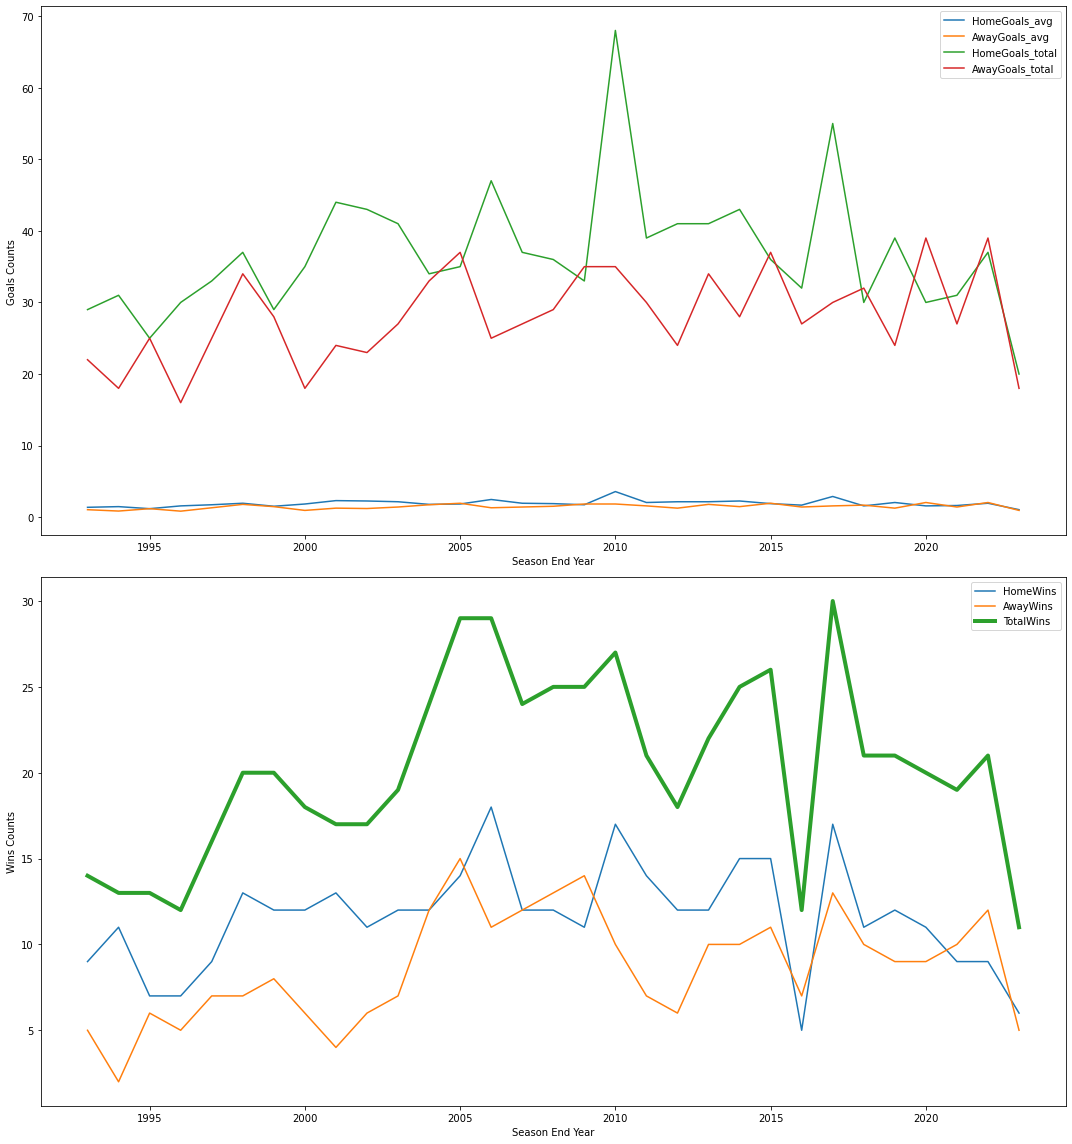

In [9]:
plt.figure(figsize=(15, 16))

plt.subplot(2, 1, 1)
sns.lineplot(data=chelsea_yearly, x='Season_End_Year', y='HomeGoals_avg', label='HomeGoals_avg')
sns.lineplot(data=chelsea_yearly, x='Season_End_Year', y='AwayGoals_avg', label='AwayGoals_avg')
sns.lineplot(data=chelsea_yearly, x='Season_End_Year', y='HomeGoals_total', label='HomeGoals_total')
sns.lineplot(data=chelsea_yearly, x='Season_End_Year', y='AwayGoals_total', label='AwayGoals_total')
plt.legend()
plt.xlabel('Season End Year')
plt.ylabel('Goals Counts')

# Subplot for wins
plt.subplot(2, 1, 2)
sns.lineplot(data=chelsea_yearly, x='Season_End_Year', y='HomeWins', label='HomeWins')
sns.lineplot(data=chelsea_yearly, x='Season_End_Year', y='AwayWins', label='AwayWins')
sns.lineplot(data=chelsea_yearly, x='Season_End_Year', y='TotalWins', label='TotalWins', linewidth=4)
plt.legend()
plt.xlabel('Season End Year')
plt.ylabel('Wins Counts')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

As expected, the scoring for both home and away tracks fairly well with seasonal total wins.
<br><br>
Now, we can go ahead and scale and process the data.

In [17]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
chelsea_scaled_array = scaler.fit_transform(chelsea_yearly)
chelsea_scaled_df = pd.DataFrame(chelsea_scaled_array, index=chelsea_yearly.index,
              columns=chelsea_yearly.columns)
chelsea_scaled_df

,HomeGoals_avg,AwayGoals_avg,HomeGoals_total,AwayGoals_total,HomeWins,AwayWins,TotalWins
Season_End_Year,,,,,,,
1993,0.129960,0.169772,0.187500,0.260870,0.307692,0.230769,0.157895
1994,0.167659,0.012422,0.229167,0.086957,0.461538,0.000000,0.105263
1995,0.054563,0.287785,0.104167,0.391304,0.153846,0.307692,0.105263
1996,0.208333,0.000000,0.208333,0.000000,0.153846,0.230769,0.052632
1997,0.270833,0.391304,0.270833,0.391304,0.307692,0.384615,0.263158
1998,0.354167,0.782609,0.354167,0.782609,0.615385,0.384615,0.473684
1999,0.187500,0.521739,0.187500,0.521739,0.538462,0.461538,0.473684
2000,0.312500,0.086957,0.312500,0.086957,0.538462,0.307692,0.368421
2001,0.500000,0.347826,0.500000,0.347826,0.615385,0.153846,0.315789


Alright - let's check to see if this changes things significantly on the plot.

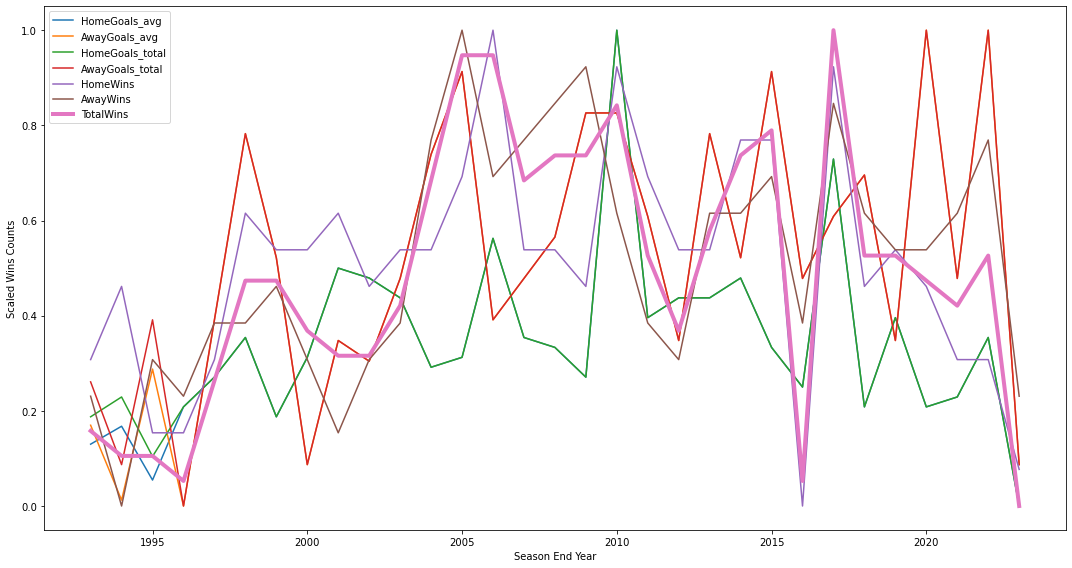

In [19]:
plt.figure(figsize=(15, 8))

sns.lineplot(data=chelsea_scaled_df, x='Season_End_Year', y='HomeGoals_avg', label='HomeGoals_avg')
sns.lineplot(data=chelsea_scaled_df, x='Season_End_Year', y='AwayGoals_avg', label='AwayGoals_avg')
sns.lineplot(data=chelsea_scaled_df, x='Season_End_Year', y='HomeGoals_total', label='HomeGoals_total')
sns.lineplot(data=chelsea_scaled_df, x='Season_End_Year', y='AwayGoals_total', label='AwayGoals_total')
sns.lineplot(data=chelsea_scaled_df, x='Season_End_Year', y='HomeWins', label='HomeWins')
sns.lineplot(data=chelsea_scaled_df, x='Season_End_Year', y='AwayWins', label='AwayWins')
sns.lineplot(data=chelsea_scaled_df, x='Season_End_Year', y='TotalWins', label='TotalWins', linewidth=4, markers='o')
plt.legend()
plt.xlabel('Season End Year')
plt.ylabel('Scaled Wins Counts')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

# Conclusion

The scaled values are quite similar! These graphs seem to compare more closely at a glance after scaling. In particular, it tracks closely with home goals and home wins. I suppose it is harder to account for adversity on the road!
<br><br>
So far this season, Chelsea is starting slowly with 0 wins, 1 loss, and 1 draw. Perhaps after we get 10-15 more games in, we'll start having a better idea of when we can have confidence in predicting their season victory!